## Exloring New York City and the city of Toronto

The main idea of this project is to explore New York City and the city of Toronto. Both towns have a high-density population, with New York City being the largest city in the US (even without Brooklyn), with 8.40 million residents. Toronto is the most populated city in Canada, being the home of over 5 million people. There are hundreds of neighborhoods in New York City and 140 neighborhoods in Toronto. The cities have a great diversity in their communities and venues, considered by the World Atlas as one of the world's most diverse cities. This project will analyze the district, areas, and venues of both cities. The data will contain pieces of information such as the name of the neighborhood, the borough, the latitude, the longitude, and their Postal Code. Another tool will also be used to explore the venues in those cities, including restaurants, cafes, bars, and gyms. Because data visualization plays a massive role in Data Science, tables, graphs, and maps will be used to present the project in an easy to understand manner. To complete this activity, a dataset from New York City and the city of Toronto will be used, in addition to the Foursquare tool.

In [7]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df = pd.read_csv (r'C:\Users\cleto\Desktop\csvData.csv')   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
print (df)

    Year  Population
0   2035     7087519
1   2030     6792840
2   2025     6491286
3   2020     6196731
4   2015     5867292
5   2010     5499233
6   2005     5035232
7   2000     4607142
8   1995     4197157
9   1990     3806957
10  1985     3355459
11  1980     3008032
12  1975     2770072
13  1970     2534788
14  1965     2092902
15  1960     1744328
16  1955     1365046
17  1950     1068305


## The following table shows the Toronto Population Data(Urban Area)

### Toronto Population 2020. (n.d.). Retrieved July 15, 2020, from https://worldpopulationreview.com/world-cities/toronto-population/

In [80]:
df.loc[:,~df.columns.str.contains('^G')]

,Year,Population
0,2035,7087519
1,2030,6792840
2,2025,6491286
3,2020,6196731
4,2015,5867292
5,2010,5499233
6,2005,5035232
7,2000,4607142
8,1995,4197157
9,1990,3806957


In [81]:
df = df.astype('int64')

## For better visualization, a bar graph represents the data:

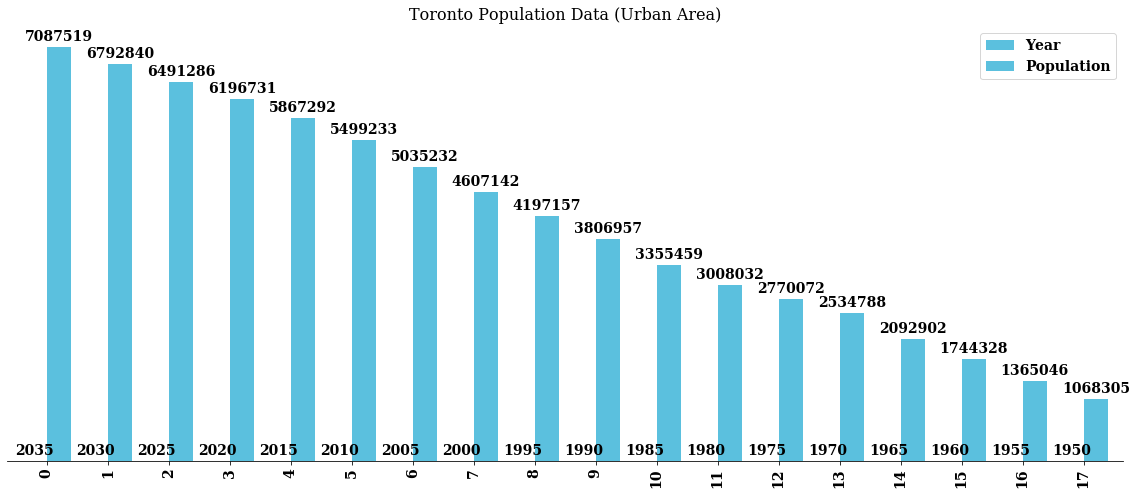

In [82]:
per = df.plot(kind='bar', 
            figsize=(20, 8), 
            width=0.8, 
            color=['#5bc0de'],
           )

per.set_title("Toronto Population Data (Urban Area)", fontsize=16)
per.spines['left'].set_visible(False)
per.spines['top'].set_visible(False)
per.spines['right'].set_visible(False)
per.axes.get_yaxis().set_visible(False)
per.tick_params(labelsize=14)
per.legend(fontsize=14)
for p in per.patches:
    per.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )

In [83]:
import json 

import requests 
from pandas.io.json import json_normalize 

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

In [84]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [85]:
from geopy.geocoders import Nominatim 

In [86]:
import folium 

### List of postal codes of Canada: M. (2020, June 01). Retrieved July 15, 2020, from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

In [87]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
df_canada = pd.read_html(url, header = 0)
df_canada = df_canada[0]

## The following table shows the Postal Code, Borough, and Neighborhood of the city of Toronto.

In [88]:
df_canada1 = df_canada[(df_canada['Borough'] != "Not assigned")]
df_canada2 = df_canada1.groupby(['Postal Code','Borough'], sort=False).agg(', '.join)
df_canada2.reset_index(inplace=True)

df_canada2['Neighborhood'] = np.where(df_canada2['Neighborhood'] == 'Not assigned',df_canada2['Borough'], df_canada2['Neighborhood'])
df_canada2

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


## The following table shows the Toronto Population Data(Urban Area)

### New York, New York Population History 1840 - 2018. (n.d.). Retrieved July 15, 2020, from https://www.biggestuscities.com/city/new-york-new-york

In [24]:
df_1 = pd.read_csv (r'C:\Users\cleto\Desktop\ny.csv')
df_1.dropna()
print(df_1)

    Year  Population  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0   2018     8398748         NaN         NaN         NaN         NaN   
1   2017     8622698         NaN         NaN         NaN         NaN   
2   2016     8537673         NaN         NaN         NaN         NaN   
3   2015     8550405         NaN         NaN         NaN         NaN   
4   2014     8491079         NaN         NaN         NaN         NaN   
5   2013     8405837         NaN         NaN         NaN         NaN   
6   2012     8336697         NaN         NaN         NaN         NaN   
7   2011     8269639         NaN         NaN         NaN         NaN   
8   2010     8175133         NaN         NaN         NaN         NaN   
9   2009     8391881         NaN         NaN         NaN         NaN   
10  2008     8346794         NaN         NaN         NaN         NaN   
11  2007     8310212         NaN         NaN         NaN         NaN   
12  2006     8250567         NaN         NaN         NaN        

In [4]:
df_1.loc[:,~df_1.columns.str.contains('^G')]

,Year,Population
0,2018,"8,398,748"
1,2017,"8,622,698"
2,2016,"8,537,673"
3,2015,"8,550,405"
4,2014,"8,491,079"
5,2013,"8,405,837"
6,2012,"8,336,697"
7,2011,"8,269,639"
8,2010,"8,175,133"
9,2009,"8,391,881"


## For better visualization, a bar graph represents the data:

In [28]:
df_1 = df_1.astype('float')


In [33]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


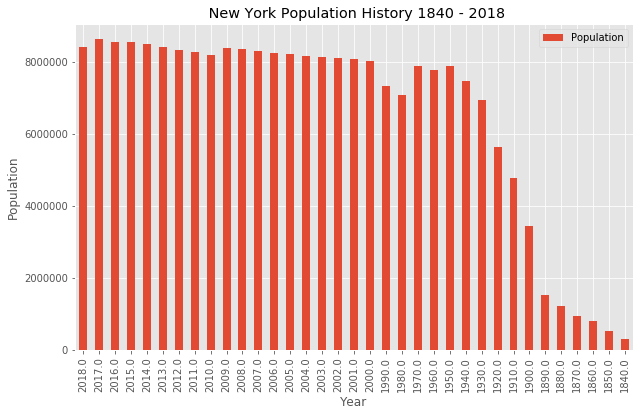

In [34]:
df_1.plot(kind='bar', x='Year', y='Population', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Population') # add y-label to the plot
plt.title(' New York Population History 1840 - 2018') # add title to the plot

plt.show()

## The following table shows the New York City Immigration

### Demographics of New York (state). (2020, July 10). Retrieved July 15, 2020, from https://en.wikipedia.org/wiki/Demographics_of_New_York_(state)

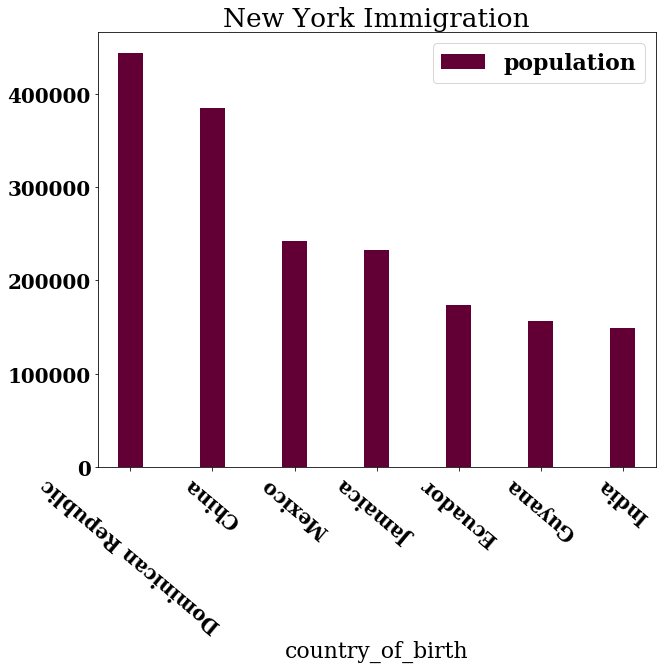

In [16]:
import matplotlib.pyplot as plot

import matplotlib     
matplotlib.rc('xtick', labelsize=20)     
matplotlib.rc('ytick', labelsize=20)

font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}	
matplotlib.rc('font', **font)

data = {"country_of_birth":['Dominican Republic', 'China', 'Mexico', 'Jamaica', 'Ecuador', 'Guyana', 'India'],
        "population":[443500, 384800, 242500, 232200, 174000, 156700, 148900]
       }

dataFrame = pd.DataFrame(data=data);
dataFrame.plot.bar(x="country_of_birth", y="population", rot=140, title="New York Immigration", figsize=(10, 8), 
            width=0.3,
            color=['#620035']
           )


### New York, New York Population 2020. (n.d.). Retrieved July 15, 2020, from https://worldpopulationreview.com/us-cities/new-york-city-ny-population

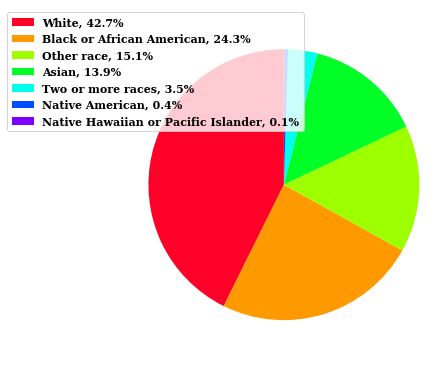

In [132]:
labels = 'White', 'Black or African American', 'Other race', 'Asian', 'Two or more races', 'Native American', 'Native Hawaiian or Pacific Islander'
sizes = [42.67, 24.27, 15.12, 13.95, 3.51, 0.43, 0.05]

fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('gist_rainbow')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.show()

## The following graph shows how new york city's unemployment rate, from January 2019 until June 2020 

### List of postal codes of Canada: M. (2020, June 01). Retrieved July 15, 2020, from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

No handles with labels found to put in legend.


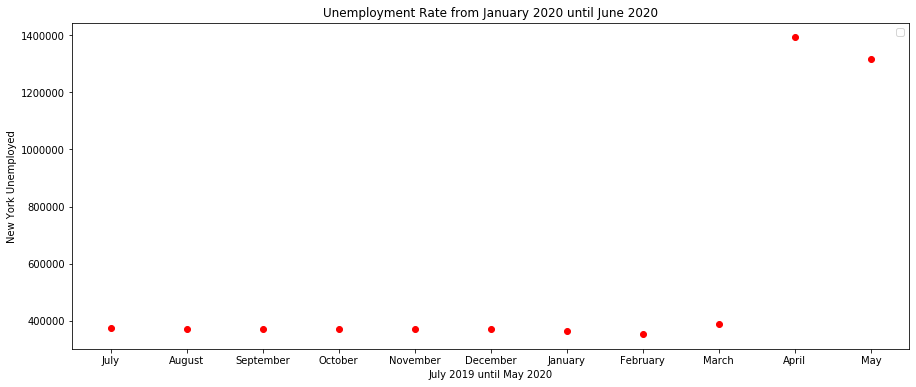

In [12]:
import matplotlib.pyplot as pyplot
fig= pyplot.figure(figsize=(15, 6))
a = ['July','August','September','October','November','December','January', 'February', 'March', 'April', 'May']
b = [373266,372324,371583,371247,371213,371454,364511, 354066,388738, 1392274, 1315995]
pyplot.scatter(a,b,color='r')
pyplot.xlabel('July 2019 until May 2020')
pyplot.ylabel('New York Unemployed')
pyplot.title('Unemployment Rate from January 2020 until June 2020')
pyplot.legend()
pyplot.show()


In [3]:
!pip install geocoder==1.5.0
from geopy.geocoders import Nominatim

import requests 
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


In [55]:
df_3 = pd.read_csv (r'C:\Users\cleto\Desktop\torontopost.csv')
df_3

,Unnamed: 0,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,0,M3A,North York,Parkwoods,43.753259,-79.329656
1,1,M4A,North York,Victoria Village,43.725882,-79.315572
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
5,5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village",43.667856,-79.532242
6,6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
7,7,M3B,North York,Don Mills,43.745906,-79.352188
8,8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937
9,9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [35]:
import folium

In [57]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent = 'toronto_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_3['Latitude'], df_3['Longitude'], df_3['Borough'], df_3['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [60]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [63]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",8,8,8,8,8,8
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",25,25,25,25,25,25
Berczy Park,57,57,57,57,57,57
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",24,24,24,24,24,24
"Business reply mail Processing Centre, South C...",17,17,17,17,17,17


In [65]:
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()

num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))       

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

kclusters = 5
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df_3

toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_new = toronto_merged.dropna()

toronto_new

----Agincourt----
----Alderwood, Long Branch----
----Bathurst Manor, Wilson Heights, Downsview North----
----Bayview Village----
----Bedford Park, Lawrence Manor East----
----Berczy Park----
----Birch Cliff, Cliffside West----
----Brockton, Parkdale Village, Exhibition Place----
----Business reply mail Processing Centre, South C...----
----CN Tower, King and Spadina, Railway Lands, Har...----
----Caledonia-Fairbanks----
----Canada Post Gateway Processing Centre----
----Cedarbrae----
----Central Bay Street----
----Christie----
----Church and Wellesley----
----Clarks Corners, Tam O'Shanter, Sullivan----
----Cliffside, Cliffcrest, Scarborough Village West----
----Commerce Court, Victoria Hotel----
----Davisville----
----Davisville North----
----Del Ray, Mount Dennis, Keelsdale and Silverthorn----
----Don Mills----
----Dorset Park, Wexford Heights, Scarborough Town...----
----Downsview----
----Dufferin, Dovercourt Village----
----East Toronto, Broadview North (Old East York)----
----Eringa

,Unnamed: 0,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant
1,1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Hockey Arena,Coffee Shop,French Restaurant,Portuguese Restaurant,Financial or Legal Service,Intersection,Drugstore,Dumpling Restaurant,Donut Shop,Eastern European Restaurant
2,2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Bakery,Park,Breakfast Spot,Pub,Theater,Café,Health Food Store,Historic Site,Hotel
3,3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Women's Store,Coffee Shop,Boutique,Shoe Store,Miscellaneous Shop,Furniture / Home Store,Event Space,Accessories Store,Vietnamese Restaurant
4,4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Diner,Yoga Studio,Park,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Restaurant
6,6,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4.0,Fast Food Restaurant,Dessert Shop,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop
7,7,M3B,North York,Don Mills,43.745906,-79.352188,1.0,Gym,Beer Store,Restaurant,Japanese Restaurant,Coffee Shop,Asian Restaurant,Dim Sum Restaurant,Chinese Restaurant,Sandwich Place,Bike Shop
8,8,M4B,East York,"Parkview Hill, Woodbine Gardens",43.706397,-79.309937,1.0,Pizza Place,Gym / Fitness Center,Bank,Café,Athletics & Sports,Gastropub,Pharmacy,Fast Food Restaurant,Breakfast Spot,Intersection
9,9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1.0,Clothing Store,Coffee Shop,Japanese Restaurant,Italian Restaurant,Café,Bubble Tea Shop,Hotel,Cosmetics Shop,Middle Eastern Restaurant,Lingerie Store
10,10,M6B,North York,Glencairn,43.709577,-79.445073,1.0,Park,Asian Restaurant,Japanese Restaurant,Pub,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run


In [66]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)


x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

toronto_merged['Cluster Labels'].isna().sum()

markers_colors = []
for lat, lon, poi, cluster in zip(toronto_new['Latitude'], toronto_new['Longitude'], toronto_new['Neighborhood'], toronto_new['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color = rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [8]:
neighborhoods_data = pd.read_csv (r'C:\Users\cleto\Desktop\nyyy.csv')
neighborhoods_data

,Unnamed: 0,Borough,Neighborhood,Latitude,Longitude
0,0,Bronx,Wakefield,40.894705,-73.847201
1,1,Bronx,Co-op City,40.874294,-73.829939
2,2,Bronx,Eastchester,40.887556,-73.827806
3,3,Bronx,Fieldston,40.895437,-73.905643
4,4,Bronx,Riverdale,40.890834,-73.912585
5,5,Bronx,Kingsbridge,40.881687,-73.902818
6,6,Manhattan,Marble Hill,40.876551,-73.910660
7,7,Bronx,Woodlawn,40.898273,-73.867315
8,8,Bronx,Norwood,40.877224,-73.879391
9,9,Bronx,Williamsbridge,40.881039,-73.857446


In [20]:
import folium

address = 'New York City, NY'

geolocator = Nominatim(user_agent = 'newyork_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Toronto using latitude and longitude values
map_ny = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_data['Latitude'], neighborhoods_data['Longitude'], neighborhoods_data['Borough'], neighborhoods_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_ny)  
    
map_ny